In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [23]:
dir_name = "../results/piston__1000__100.00_0.01_50.00_1.00_0.00__1_2"
data_dir = dir_name + "/data/"

n_cells = 1000
data = pd.read_csv(data_dir + 'cell_params.txt', delimiter='\t', names=["t", 'x', 'r', 'u', 'p'], index_col=False)
# data['x'] = data.index
length = int(len(data.index) / n_cells)

GAMMA = 5. / 3
c_v = 8.31 / (GAMMA - 1)
# data['s'] = 1 + c_v * np.log(data['p'] / (data['r'] ** GAMMA))

filtered_data = data

sorted_data = data

In [24]:
data

,t,x,r,u,p
0,0.0002,0.161000,1.000000,0.000000,1.000000
1,0.0002,0.162000,1.000000,0.000000,1.000000
2,0.0002,0.163000,1.000000,0.000000,1.000000
3,0.0002,0.164000,1.000000,0.000000,1.000000
4,0.0002,0.165000,1.000000,0.000000,1.000000
...,...,...,...,...,...
399994,99.9501,0.355220,0.994684,-0.001932,0.994684
399995,99.9501,0.356220,0.994991,-0.001629,0.994991
399996,99.9501,0.357219,0.995301,-0.001324,0.995301
399997,99.9501,0.358219,0.995612,-0.001017,0.995612


In [25]:
t_min = sorted_data['t'].min()
t_max = sorted_data['t'].max()
t_interp = np.linspace(t_min, t_max, len(data['t'].unique()))
t_step = t_interp[1] - t_interp[0]

In [26]:
parameters = {'r' :  'density', 
             'p' : 'pressure', 
             'u' : 'velocity'}

In [27]:
parameter = 'r'

In [28]:
x_point = 0.26
r_interp = []
for t in t_interp:
    # выбрать ближайшие точки из отфильтрованных данных
    nearest_points = filtered_data[filtered_data['t'].between(t-t_step, t+t_step)]
#     print(nearest_points)
    # выполнить линейную интерполяцию значений r на выбранном интервале времени
    try:
        interp_func = interp1d(nearest_points['x'], nearest_points[parameter], kind='linear', fill_value="extrapolate")
    except ValueError:
        print(nearest_points)
        break
    r_at_x_point = interp_func(x_point)
    r_interp.append(r_at_x_point)
    
t_interp = t_interp[:len(r_interp)]

In [29]:
r_fft

array([ 3.27515792e-14+0.j        , -1.43681903e-01-1.75902478j,
       -1.72693531e-01-0.98569148j, ...,  1.09733296e-01+0.55131276j,
       -1.72693531e-01+0.98569148j, -1.43681903e-01+1.75902478j])

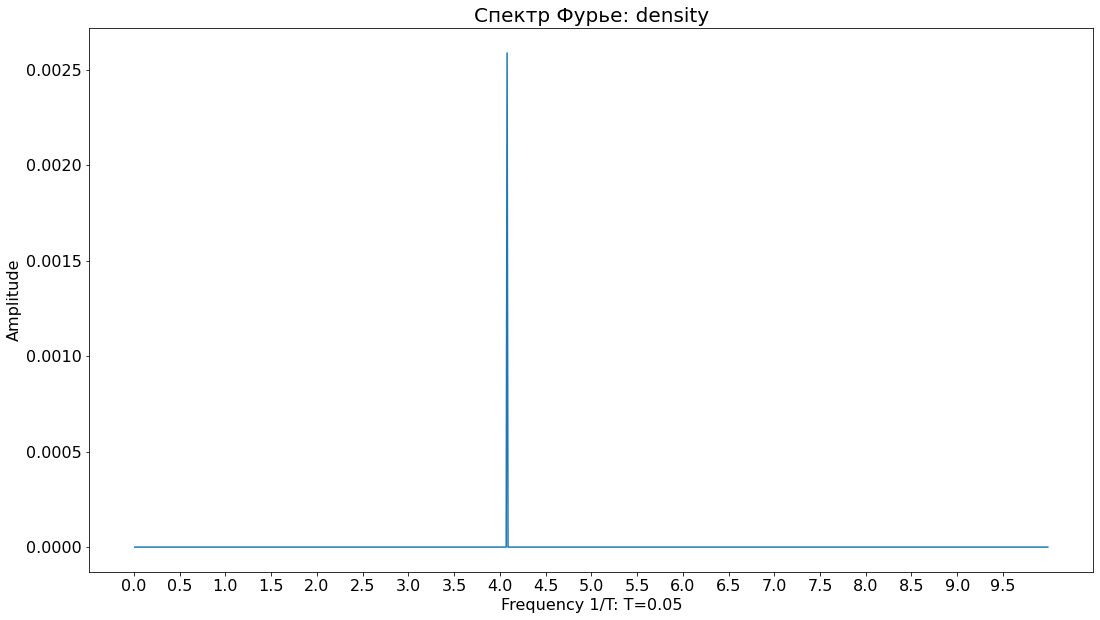

In [30]:
r_mean = np.mean(r_interp)
r_interp_centered = r_interp - r_mean

# получение спектра Фурье
r_fft = np.fft.fft(r_interp_centered)

# перемещение отрицательных частот в начало массива
r_fft_shifted = np.fft.fftshift(r_fft)

# отображение только второй половины массива
N = len(r_fft)
freq = np.fft.fftfreq(N, d=t_step)
freq_shifted = np.fft.fftshift(freq)

mask = freq_shifted > 0
freq_pos = freq_shifted[mask]
r_fft_pos = 2.0/N * np.abs(r_fft_shifted[mask])
r_fft_pos[abs(r_fft_pos) < 0.002] = 0


fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)


r_fft_pos[abs(r_fft_pos) < 0.002] = 0
plt.plot(freq_pos, r_fft_pos)


ax.set_xlabel('Frequency 1/T' +  ": T=" + str(round(t_step, 3)), fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.xticks(np.arange(0, max(freq_pos), 0.5), fontsize=16)
plt.title("Спектр Фурье: " + parameters[parameter], fontsize=20)
plt.yticks(fontsize=16)
# plt.xlim(0, 4)
plt.show(block=False)
plt.close()


In [33]:
def get_fourier(parameter) :
    x_point = 0.26
    r_interp = []
    
    t_min = sorted_data['t'].min()
    t_max = sorted_data['t'].max()
    t_interp = np.linspace(t_min, t_max, len(data['t'].unique()))
    t_step = t_interp[1] - t_interp[0]
    for t in t_interp:
        # выбрать ближайшие точки из отфильтрованных данных
        nearest_points = filtered_data[filtered_data['t'].between(t-t_step, t+t_step)]
    #     print(nearest_points)
        # выполнить линейную интерполяцию значений r на выбранном интервале времени
        try:
            interp_func = interp1d(nearest_points['x'], nearest_points[parameter], kind='linear', fill_value="extrapolate")
        except ValueError:
            print(nearest_points)
            break
        r_at_x_point = interp_func(x_point)
        r_interp.append(r_at_x_point)

    t_interp = t_interp[:len(r_interp)]
    
    r_mean = np.mean(r_interp)
    r_interp_centered = r_interp - r_mean

    # получение спектра Фурье
    r_fft = np.fft.fft(r_interp_centered)

    # перемещение отрицательных частот в начало массива
    r_fft_shifted = np.fft.fftshift(r_fft)

    # отображение только второй половины массива
    N = len(r_fft)
    freq = np.fft.fftfreq(N, d=t_step)
    freq_shifted = np.fft.fftshift(freq)

    mask = freq_shifted > 0
    freq_pos = freq_shifted[mask]
    r_fft_pos = 2.0/N * np.abs(r_fft_shifted[mask])
    r_fft_pos[abs(r_fft_pos) < 0.002] = 0
    
    return freq_pos, r_fft_pos

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# создаем фигуру с тремя подграфиками
fig = make_subplots(rows=1, cols=3, subplot_titles=("density", "velocity", "pressure"))

# добавляем данные на каждый подграфик
x, y = get_fourier("r")
fig.add_trace(go.Scatter(x=x, y=y, mode='lines'), row=1, col=1, )

x, y = get_fourier("u")
fig.add_trace(go.Scatter(x=x, y=y, mode='lines'), row=1, col=2)
x, y = get_fourier("p")
fig.add_trace(go.Scatter(x=x, y=y, mode='lines'), row=1, col=3)

# задаем заголовок и метки осей для всей фигуры
fig.update_layout(title_text="Спектр Фурье", xaxis_title="X", yaxis_title="Y")

# изменяем размер графиков
fig.update_layout(height=400, width=1600)
fig.update_xaxes(range=[0, 5], autorange=False)

fig.update_xaxes(dtick=0.5)
fig.update_traces(showlegend=False)


# выводим фигуру
fig.show()
# fig.write_image(dir_name+"/plots/fourier_transform_" + str(x_point) + ".png")

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# добавляем вертикальные линии для правой части спектра Фурье
fig.add_trace(go.Scatter(x=freq_pos, y=r_fft_pos, mode='lines'))

# задаем заголовок и метки осей
fig.update_layout(title="Спектр Фурье: " + parameters[parameter], xaxis_title='Frequency', yaxis_title='Amplitude')

fig.update_xaxes(range=[0, 5], autorange=False)
fig.update_layout(width=500, height=500)


# выводим график
fig.show()

fig.write_image(dir_name+"/plots/fourier_transform_" + parameters[parameter] + ".png")

Text(0.5, 1.0, 'Fourier transform')

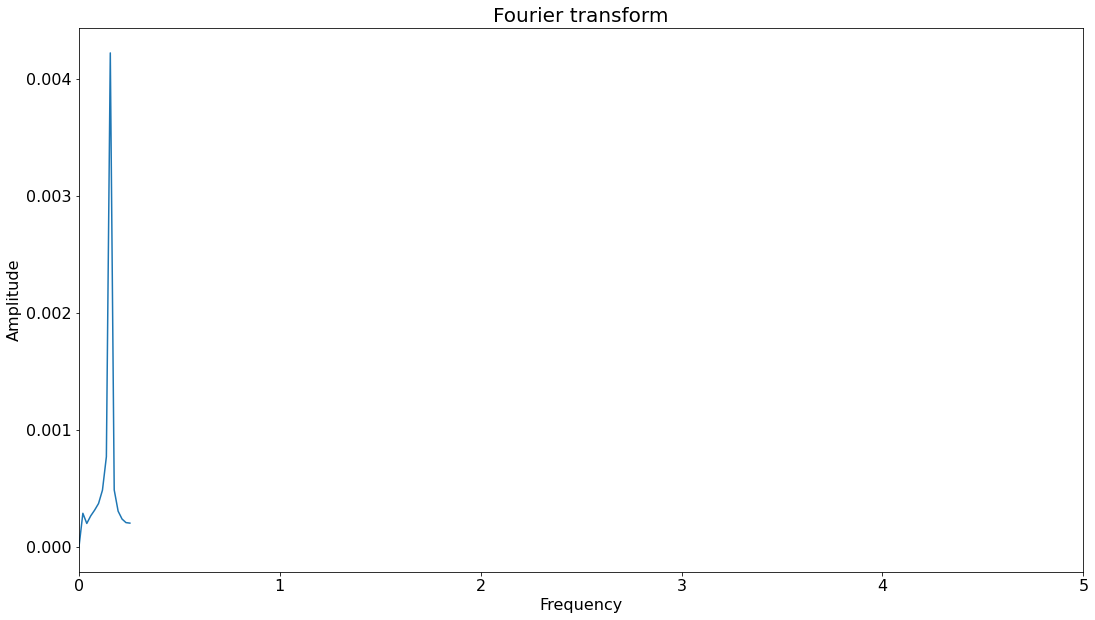

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import scipy

import sys

n_cells = 1000
data_dir = "../results/piston__1000__100.00_0.01_50.00_1.00_0.00__0_0" + "/data/"


data = pd.read_csv(data_dir + 'piston_r_u_p.txt', delimiter='\t', names=['r', 'u', 'p', 't'])
data['x'] = data.index

n_steps = int(len(data) / n_cells)

point = 0.5

p_i= []
for i in range(n_steps):
    x = data.iloc[i*n_cells:(i + 1)*n_cells]["x"]
    p = data.iloc[i*n_cells:(i + 1)*n_cells]["p"]
    p_new = np.interp(point, x, p)
    p_i.append(p_new)

t_i = data["t"].unique()
contact_cell = pd.DataFrame(p_i, columns=["p"])
contact_cell["t"] = t_i
contact_cell = contact_cell.iloc[:len(contact_cell) // 2]
p_mean = contact_cell['p'].mean()
contact_cell['p'] -= p_mean

p = contact_cell['p'].iloc[:].to_numpy()

t = contact_cell['t'].iloc[:].to_numpy()

tr = np.linspace(min(t), max(t), len(t))
vr = scipy.signal.resample(p, len(t))

L = len(tr)
Ts = np.mean(np.diff(tr))
Fs = 1/Ts
Fn = Fs/2
FTvr = fftpack.fft(vr)/L
Fv = np.linspace(0, 1, L//2 +1) * Fn
len(FTvr[1:len(Fv)])

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)
plt.plot(Fv, np.abs(FTvr[0:len(Fv)] * 2))
ax.set_xlabel('Frequency', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, 5)
plt.title("Fourier transform", fontsize=20)

In [3]:
p

array([ 3.88790757e-04, -3.39226721e-03,  2.13852344e-03,  3.89409675e-03,
       -4.03664787e-03,  2.52648297e-05,  4.70993367e-03, -2.39050948e-03,
       -1.99420157e-03,  3.94949951e-03,  3.63009906e-04, -3.68173282e-03,
        2.04720282e-03,  2.97041958e-03, -4.45670924e-03, -2.09888273e-04,
        4.48272734e-03, -3.62578640e-03, -2.29296612e-03,  4.46495958e-03,
       -1.09002683e-03, -3.89547662e-03,  3.10124111e-03,  2.31051359e-03,
       -4.69228585e-03,  9.12315422e-04])

In [4]:
t

array([ 0.      ,  1.97528 ,  3.947493,  5.919396,  7.891197,  9.86305 ,
       11.8349  , 13.8067  , 15.77855 , 17.75039 , 19.72221 , 21.69405 ,
       23.66588 , 25.63773 , 27.60954 , 29.58139 , 31.55325 , 33.52505 ,
       35.4969  , 37.46877 , 39.44057 , 41.41243 , 43.38429 , 45.35612 ,
       47.32797 , 49.29983 ])

In [5]:
data

,r,u,p,t,x
0.000000,1.000000,0.000000,0.600000,0.0,0.000000
0.001000,1.000000,0.000000,0.600000,0.0,0.001000
0.002000,1.000000,0.000000,0.600000,0.0,0.002000
0.003000,1.000000,0.000000,0.600000,0.0,0.003000
0.004000,1.000000,0.000000,0.600000,0.0,0.004000
...,...,...,...,...,...
1.016433,0.998236,-0.007770,0.600464,100.0,1.016433
1.017437,0.998132,-0.007859,0.600360,100.0,1.017437
1.018441,0.998029,-0.007926,0.600257,100.0,1.018441
1.019445,0.997926,-0.007971,0.600154,100.0,1.019445


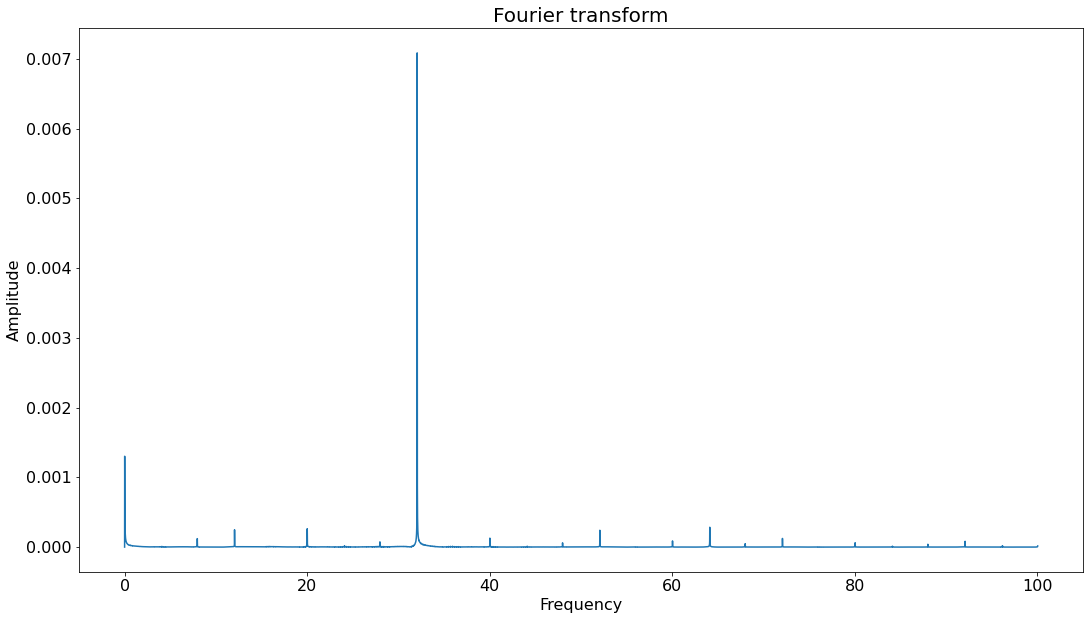

In [22]:
n_cells = 1000
data_dir = "../results/piston__1000__100.00_0.01_50.00_1.00_0.00__1_2" + "/data/"

data = pd.read_csv(data_dir + 'cell_params.txt', delimiter='\t', names=['t', "x", 'r', 'u', 'p'], index_col=False)
length = int(len(data.index) / n_cells)

contact_cell = data.copy()

param = 'r'

p_mean = contact_cell[param].mean()
contact_cell[param] -= p_mean

p = contact_cell[param].iloc[:].to_numpy()
t = contact_cell['t'].iloc[:].to_numpy()
tr = np.linspace(min(t), max(t), len(t))
vr = scipy.signal.resample(p, len(t))

L = len(tr)
Ts = np.mean(np.diff(tr))
Fs = 1 / Ts
Fn = Fs / 2
FTvr = fftpack.fft(vr) / L
Fv = np.linspace(0, 1, L // 2 + 1) * Fn

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)
plt.plot(Fv[:10000], np.abs(FTvr[0:len(Fv)] * 2)[:10000])
ax.set_xlabel('Frequency', fontsize=16)
ax.set_ylabel('Amplitude', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Fourier transform", fontsize=20)
plt.show(block=False)
plt.close()